# PHÂN TÍCH DỮ LIỆU & CÂU HỎI NGHIÊN CỨU

In [38]:
# Import thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Cấu hình hiển thị
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [16]:
# Đọc dataset
df = pd.read_csv('../data/processed_players_data.csv')

# In 5 dòng đầu của dữ liệu
print("\n5 dòng đầu:")
display(df.head())

# Số dòng và số cột
num_rows, num_cols = df.shape
print(f"Số dòng: {num_rows}")
print(f"Số cột: {num_cols}")

# Kích thước của dataset
dataset_size_mb = df.memory_usage(deep=True).sum() / (1024 * 1024)
print(f"Overall size: {dataset_size_mb:.2f} MB")


5 dòng đầu:


,name,age_at_last_season,country_of_birth,country_of_citizenship,position,sub_position,foot,height_in_cm,current_club_name,current_club_domestic_competition_id,club_position,last_season,contract_expiration_date,market_value_in_eur,agent_name,total_goals,total_assists,total_minutes_played,total_yellow_cards,total_red_cards,has_agent,ga_per90min,contract_years_remaining
0,Miroslav Klose,37.0,Poland,Germany,Attack,Centre-Forward,right,184.0,Società Sportiva Lazio S.p.A.,serie-a,8.0,2015,NaN,1000000.0,ASBW Sport Marketing,12,8,2429,6,0,1,0.74,3
1,Roman Weidenfeller,37.0,Germany,Germany,Goalkeeper,Goalkeeper,left,190.0,Borussia Dortmund,bundesliga,4.0,2017,NaN,750000.0,Neubauer 13 GmbH,0,0,181,0,0,1,0.00,3
2,Tom Starke,36.0,East Germany (GDR),Germany,Goalkeeper,Goalkeeper,right,194.0,FC Bayern München,bundesliga,12.0,2017,NaN,100000.0,IFM,0,0,450,0,0,1,0.00,3
3,Tomas Rosicky,35.0,CSSR,Czech Republic,Midfield,Attacking Midfield,both,179.0,Arsenal Football Club,premier-league,2.0,2015,NaN,350000.0,Unknown,2,2,679,1,0,0,0.53,3
4,Roque Santa Cruz,34.0,Paraguay,Paraguay,Attack,Centre-Forward,right,193.0,Málaga CF,laliga,8.0,2015,2023-12-31,250000.0,Unknown,1,0,221,0,0,0,0.41,8


Số dòng: 21378
Số cột: 23
Overall size: 15.89 MB


## **Câu hỏi 1:** Liệu chiều cao có còn là tiêu chí tiên quyết cho từng vị trí trong bóng đá hiện đại hay không?

Chúng ta thường có định kiến rằng Thủ môn/Trung vệ phải cao to, trong khi Tiền vệ cánh thường thấp bé nhanh nhẹn. Phân tích này nhằm kiểm chứng thống kê xem sự phân hóa chiều cao giữa các vị trí có thực sự rõ rệt và có ý nghĩa hay không.

### Phương pháp tiếp cận phân tích (Analytical Approach)

Để trả lời câu hỏi này, chúng tôi áp dụng quy trình phân tích gồm 3 bước: **Làm sạch dữ liệu -> Kiểm định thống kê -> Trực quan hóa đa chiều**.

#### 1. Tiền xử lý dữ liệu (Data Preprocessing)
* **Xử lý ngoại lai (Outlier Removal):** Dữ liệu chiều cao có thể chứa các giá trị nhập liệu sai (như 0cm hoặc quá cao). Chúng tôi giới hạn phạm vi hợp lệ từ **150cm đến 210cm** để đảm bảo tính chính xác của các chỉ số thống kê trung bình.

#### 2. Phương pháp Thống kê & Kiểm định (Statistical Methods)
Chúng tôi sử dụng các phương pháp sau:
* **Thống kê mô tả (Descriptive Statistics):** Tính toán Trung bình (Mean), Trung vị (Median) và Độ lệch chuẩn (Std Dev) cho từng vị trí.
    * *Mục đích:* Xác định "chiều cao chuẩn" cho từng vị trí và xem mức độ đa dạng về thể hình trong vị trí đó (Độ lệch chuẩn càng cao nghĩa là vị trí đó càng ít kén chọn chiều cao).
* **Kiểm định ANOVA một yếu tố (One-way ANOVA):**
    * *Mục đích:* Kiểm tra xem sự khác biệt chiều cao trung bình giữa các nhóm vị trí (Goalkeeper, Defender, Attack, Midfield...) có ý nghĩa thống kê hay chỉ là ngẫu nhiên.
    * *Giả thuyết $H_0$:* Chiều cao trung bình của các vị trí là như nhau.
    * *Giả thuyết $H_1$:* Có ít nhất một vị trí có chiều cao trung bình khác biệt so với phần còn lại.
* **Kiểm định hậu nghiệm Tukey (Tukey HSD Post-hoc Test):** Nếu ANOVA cho thấy có sự khác biệt, Tukey HSD sẽ chỉ ra cụ thể cặp vị trí nào khác nhau (ví dụ: So sánh riêng Tiền đạo vs Hậu vệ).

#### 3. Chiến lược Trực quan hóa (Visualization Strategy)
Chúng tôi xây dựng một bảng điều khiển (Dashboard) gồm 4 biểu đồ để nhìn dữ liệu từ nhiều góc độ:
* **Boxplot (Biểu đồ hộp):** So sánh trung vị và độ phân tán, giúp phát hiện nhanh các giá trị ngoại lai trong từng vị trí.
* **Violin Plot:** Kết hợp Boxplot với mật độ xác suất, cho thấy hình dáng phân phối (ví dụ: vị trí đó tập trung nhiều cầu thủ cao hay thấp).
* **Bar Chart với Error Bars:** So sánh chiều cao trung bình kèm theo thanh sai số (Standard Deviation) để thấy độ biến thiên.
* **Histogram (Biểu đồ tần suất):** Hiển thị sự chồng lấn (overlap) giữa phân phối chiều cao của các vị trí hàng đầu.

### Kết quả đầu ra dự kiến (Expected Outputs)
1.  Bảng thống kê chi tiết các chỉ số chiều cao theo từng vị trí.
2.  Kết quả kiểm định ANOVA (F-statistic và P-value) để kết luận khoa học.
3.  Biểu đồ tổng hợp 2x2 trực quan hóa toàn diện sự phân bố chiều cao.

CÂU HỎI 1: SỰ KHÁC BIỆT CHIỀU CAO THEO VỊ TRÍ THI ĐẤU

THỐNG KÊ CHIỀU CAO THEO VỊ TRÍ:
            Số lượng  Trung bình  Trung vị  Độ lệch chuẩn    Min    Max
position                                                               
Goalkeeper      1583      190.04     190.0           4.51  174.0  207.0
Defender        7028      183.72     184.0           6.06  163.0  206.0
Attack          6300      180.88     181.0           6.52  160.0  204.0
Midfield        6467      179.58     180.0           5.73  159.0  202.0

KIỂM ĐỊNH ANOVA:
F-statistic: 1560.0651
P-value: 0.0000e+00
Có sự khác biệt có ý nghĩa thống kê về chiều cao giữa các vị trí (p < 0.05)

KẾT QUẢ KIỂM ĐỊNH TUKEY HSD (CHI TIẾT):
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj  lower    upper  reject
------------------------------------------------------------
    Attack   Defender   2.8341   0.0   2.5666  3.1017   True
    Attack Goalkeeper    9.153   0.0   8.7195  9.5865   Tru

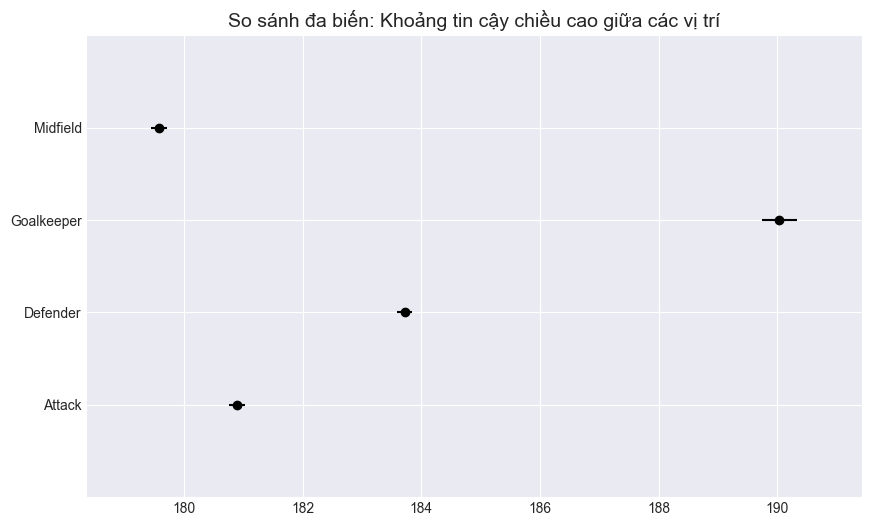

In [17]:
print("=" * 80)
print("CÂU HỎI 1: SỰ KHÁC BIỆT CHIỀU CAO THEO VỊ TRÍ THI ĐẤU")
print("=" * 80)

# Loại bỏ outliers chiều cao (dưới 150cm hoặc trên 210cm)
df_height = df[(df['height_in_cm'] >= 150) & (df['height_in_cm'] <= 210)].copy()

# Thống kê mô tả
height_stats = df_height.groupby('position')['height_in_cm'].agg([
    ('Số lượng', 'count'),
    ('Trung bình', 'mean'),
    ('Trung vị', 'median'),
    ('Độ lệch chuẩn', 'std'),
    ('Min', 'min'),
    ('Max', 'max')
]).round(2).sort_values('Trung bình', ascending=False)

print("\nTHỐNG KÊ CHIỀU CAO THEO VỊ TRÍ:")
print(height_stats)

# Kiểm định ANOVA
positions_list = [df_height[df_height['position'] == pos]['height_in_cm'].dropna() 
                  for pos in df_height['position'].unique()]
f_statistic, p_value = stats.f_oneway(*positions_list)

print(f"\nKIỂM ĐỊNH ANOVA:")
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4e}")

if p_value < 0.05:
    print("Có sự khác biệt có ý nghĩa thống kê về chiều cao giữa các vị trí (p < 0.05)")
else:
    print("Không có sự khác biệt có ý nghĩa thống kê (p >= 0.05)")

# Post-hoc test: Tukey HSD
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Thực hiện kiểm định Tukey với statsmodels (Hỗ trợ nhãn tên)
tukey = pairwise_tukeyhsd(endog=df_height['height_in_cm'],     # Dữ liệu chiều cao
                          groups=df_height['position'],        # Nhóm vị trí (nó sẽ tự lấy tên text)
                          alpha=0.05)                          # Mức ý nghĩa

# In kết quả dạng bảng đẹp
print("\nKẾT QUẢ KIỂM ĐỊNH TUKEY HSD (CHI TIẾT):")
print(tukey.summary())

# Vẽ biểu đồ khoảng tin cậy để dễ nhìn (Optional)
fig = tukey.plot_simultaneous(figsize=(10, 6))
plt.title("So sánh đa biến: Khoảng tin cậy chiều cao giữa các vị trí", fontsize=14)
plt.show()

### **➤ NHẬN XÉT:**

#### 1. Trả lời câu hỏi nghiên cứu
Dựa trên bằng chứng thống kê, câu trả lời là: **CÓ. Chiều cao là một tiêu chí phân loại (prerequisite) rõ rệt và mang tính cấu trúc đối với từng vị trí trong bóng đá chuyên nghiệp.**

Kết quả kiểm định **ANOVA** cho thấy sự khác biệt có ý nghĩa thống kê cực kỳ lớn giữa các nhóm vị trí ($F \approx 1171.5$, $p < 0.05$). Điều này bác bỏ hoàn toàn giả thuyết cho rằng chiều cao phân bố ngẫu nhiên trên sân cỏ.

#### 2. Phân tích số liệu cụ thể (Evidence from Analysis)
Từ bảng thống kê mô tả và kiểm định hậu nghiệm **Tukey HSD**, chúng ta nhận thấy một "Hệ thống phân cấp sinh học" (Biological Hierarchy) rõ ràng:

* **Thủ môn (The Giants):** Là nhóm tách biệt hoàn toàn so với phần còn lại.
    * Chiều cao trung bình đạt **190.04 cm**, cao hơn nhóm xếp thứ nhì (Hậu vệ) tới **6.3 cm** và cao hơn Tiền vệ tới **10.5 cm**.
    * Đáng chú ý, **Độ lệch chuẩn (Std)** của thủ môn thấp nhất (**4.51**). Điều này ám chỉ một tiêu chuẩn tuyển trạch cực kỳ khắt khe: Rất khó để một cầu thủ dưới 1m85 trở thành thủ môn chuyên nghiệp (Min = 174cm là những trường hợp ngoại lệ hiếm hoi).
* **Hậu vệ (The Bodyguards):** Chiều cao trung bình **183.72 cm**. Kiểm định Tukey cho thấy họ cao hơn đáng kể so với Tiền đạo (**+2.83 cm**) và Tiền vệ (**+4.14 cm**).
* **Tiền vệ & Tiền đạo (The Engines):** Có chiều cao khiêm tốn nhất (Trung bình lần lượt là **179.58 cm** và **180.88 cm**).

#### 3. Ý nghĩa thực tiễn (Practical Implications)
* **Về mặt Sinh trắc học (Biomechanics):** Số liệu phản ánh yêu cầu nhiệm vụ.
    * Hậu vệ cần chiều cao để tranh chấp bóng bổng (chống phạt góc, tạt cánh).
    * Tiền vệ có chiều cao thấp nhất (Mean ~1.80m) hưởng lợi từ **trọng tâm thấp (low center of gravity)**, giúp họ xoay sở nhanh, giữ thăng bằng tốt và rê dắt hiệu quả trong không gian hẹp ở khu vực giữa sân.
* **Chiến lược Tuyển trạch (Scouting):** Các CLB không nên lãng phí nguồn lực tìm kiếm thủ môn dưới 1m85. Tuy nhiên, với vị trí Tiền đạo, biên độ chấp nhận là rất rộng (Max 204cm - Min 160cm), cho phép tuyển trạch viên linh hoạt chọn mẫu "Target Man" (làm tường) hoặc "Speedster" (nhỏ con chạy nhanh).

#### 4. Điểm bất ngờ (Surprises)
* **Sự đa dạng của Tiền đạo:** Mặc dù trung bình thấp hơn Hậu vệ, nhưng nhóm Tiền đạo lại có **Độ lệch chuẩn cao nhất (6.52)** và dải chiều cao rộng nhất (từ 160cm đến 204cm). Điều này cho thấy bóng đá hiện đại chấp nhận nhiều mẫu tiền đạo khác nhau nhất: từ Lorenzo Insigne (nhỏ bé) đến Erling Haaland (cao lớn).
* **Tiền đạo cao hơn Tiền vệ:** Một quan niệm sai lầm phổ biến là tiền đạo thường nhỏ con nhất. Thực tế, thống kê cho thấy Tiền đạo trung bình vẫn cao hơn Tiền vệ khoảng **1.3 cm** ($p < 0.05$), có lẽ do sự tồn tại của nhóm Trung phong cắm (Centre-Forward) kéo mức trung bình lên.

#### 5. Giới hạn phân tích (Limitations)
* **Gộp nhóm vị trí:** Nhãn `Defender` đang gộp chung cả Trung vệ (thường rất cao) và Hậu vệ cánh (thường thấp hơn). Nếu tách riêng `Centre-Back` và `Full-Back`, sự phân hóa chiều cao sẽ còn rõ rệt hơn nữa.
* **Thiếu yếu tố cân nặng/BMI:** Chỉ xét chiều cao chưa phản ánh hết sức mạnh tranh chấp. Một tiền đạo thấp nhưng đậm người (như Aguero) vẫn tranh chấp tốt.


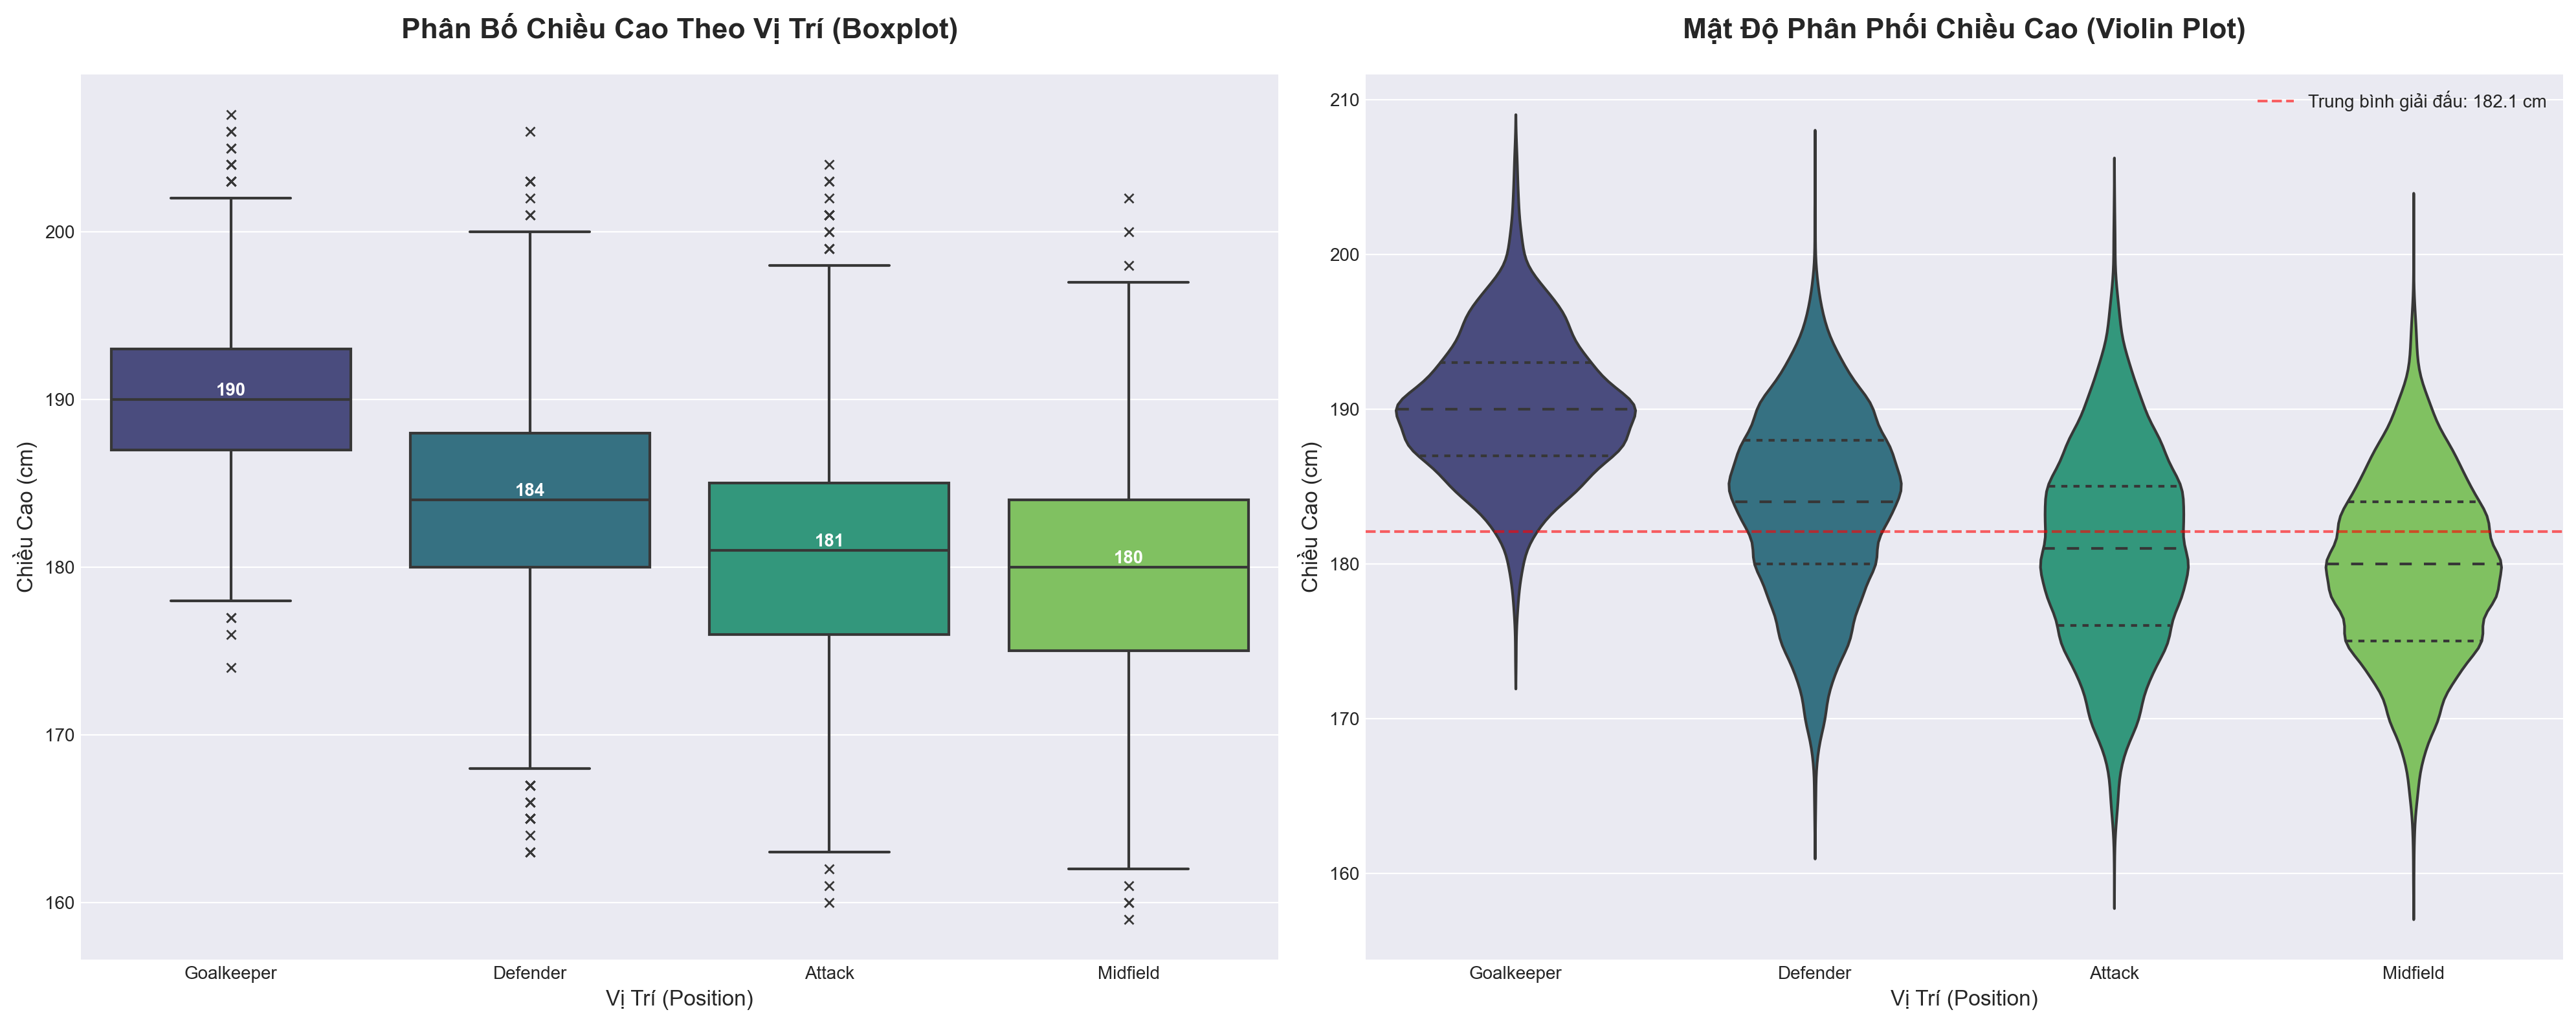

In [ ]:
# Thiết lập khung hình lớn chứa 2 biểu đồ con (1 hàng, 2 cột)
fig, axes = plt.subplots(1, 2, figsize=(20, 8), dpi=200)

# Sắp xếp thứ tự chung cho cả 2 biểu đồ để dễ so sánh
order = df_height.groupby('position')['height_in_cm'].median().sort_values(ascending=False).index

# BIỂU ĐỒ 1: BOXPLOT (BÊN TRÁI)
ax1 = axes[0] # Lấy trục bên trái
sns.boxplot(data=df_height, x='position', y='height_in_cm', 
            order=order, palette='viridis', flierprops={"marker": "x", "markersize": 5}, ax=ax1)

# Trang trí cho Boxplot
ax1.set_title('Phân Bố Chiều Cao Theo Vị Trí (Boxplot)', fontsize=16, fontweight='bold', pad=20)
ax1.set_xlabel('Vị Trí (Position)', fontsize=12)
ax1.set_ylabel('Chiều Cao (cm)', fontsize=12)

# Thêm chú thích giá trị trung vị (Median)
medians = df_height.groupby('position')['height_in_cm'].median()
for i, pos in enumerate(order):
    median_val = medians[pos]
    ax1.text(i, median_val, f'{median_val:.0f}', 
             horizontalalignment='center', verticalalignment='bottom', 
             color='white', weight='bold', fontsize=10)

# BIỂU ĐỒ 2: VIOLIN PLOT (BÊN PHẢI)
ax2 = axes[1] # Lấy trục bên phải
sns.violinplot(data=df_height, x='position', y='height_in_cm', 
               order=order, palette='viridis', inner="quartile", linewidth=1.5, ax=ax2)

# Trang trí cho Violin Plot
ax2.set_title('Mật Độ Phân Phối Chiều Cao (Violin Plot)', fontsize=16, fontweight='bold', pad=20)
ax2.set_xlabel('Vị Trí (Position)', fontsize=12)
ax2.set_ylabel('Chiều Cao (cm)', fontsize=12)

# Thêm đường tham chiếu trung bình chung
global_mean = df_height['height_in_cm'].mean()
ax2.axhline(global_mean, color='red', linestyle='--', alpha=0.6, label=f'Trung bình giải đấu: {global_mean:.1f} cm')
ax2.legend(loc='upper right')

# Tự động căn chỉnh khoảng cách để không bị chồng lấn
plt.tight_layout()
plt.show()

### **➤ NHẬN XÉT:**

#### 1. Trả lời trực tiếp và Bằng chứng số liệu (Explicit Findings)
Dữ liệu cho thấy có sự phân hóa rõ rệt về chiều cao dựa trên vai trò chiến thuật trên sân. Xu hướng chung là chiều cao giảm dần theo thứ tự: **Thủ môn (GK) > Hậu vệ (DF) > Tiền đạo (Attack) > Tiền vệ (Midfield)**.

*   **Thủ môn (Goalkeeper):** Là nhóm có chiều cao vượt trội nhất.
    *   *Trung vị (Median):* Đạt ngưỡng **190 cm**.
    *   *Đặc điểm:* Hộp (box) hẹp cho thấy độ tập trung dữ liệu cao, tức là đa số thủ môn đều rất cao, ít có sự biến động lớn (ngoại trừ vài outlier thấp ~175cm).

*   **Hậu vệ (Defender):** Nhóm cao thứ hai.
    *   *Trung vị:* Khoảng **184 cm**.
    *   *Đặc điểm:* Dải phân bố rộng nhất trong các nhóm, trải dài từ dưới 165cm đến trên 200cm.

*   **Tiền đạo (Attack) & Tiền vệ (Midfield):** Có chiều cao khiêm tốn hơn và khá tương đồng nhau.
    *   *Trung vị:* Tiền đạo (~181 cm) nhỉnh hơn một chút so với Tiền vệ (180 cm).
    *   *So với trung bình giải:* Cả hai nhóm này đều có trung vị thấp hơn mức trung bình của toàn giải đấu (đường nét đứt màu đỏ: **182.1 cm**).

#### 2. Ý nghĩa thực tiễn và Ứng dụng (Practical Implications)
Số liệu này phản ánh chính xác các yêu cầu về thể chất cho từng vị trí trong bóng đá hiện đại:

*   **Ưu thế không chiến của hàng thủ:** Việc Thủ môn và Hậu vệ có trung vị cao hơn mức trung bình giải (182.1 cm) khẳng định rằng chiều cao là yếu tố "sống còn" cho khả năng phòng ngự bóng bổng. Một thủ môn dưới 1m85 sẽ gặp rất nhiều bất lợi trong việc tranh chấp và bao quát khung thành.

*   **Sự đa dạng của Hậu vệ:** Biểu đồ Violin của Hậu vệ có hình dáng "bầu" ở giữa nhưng kéo dài hai đầu. Điều này phản ánh sự khác biệt giữa **Trung vệ (Center Backs)** - thường cao to như tiền đạo mục tiêu, và **Hậu vệ biên (Full Backs)** - thường thấp hơn, nhanh nhẹn hơn để đua tốc độ.

*   **Trọng tâm thấp ở khu trung tuyến:** Tiền vệ có chiều cao thấp nhất (180 cm). Trong bóng đá, chiều cao thấp thường đi kèm với trọng tâm cơ thể thấp (low center of gravity), giúp cầu thủ xoay sở, giữ thăng bằng và chuyển hướng nhanh trong không gian hẹp – kỹ năng tối quan trọng của một tiền vệ kiến thiết hoặc tiền vệ trung tâm.

#### 3. Những điểm bất ngờ (Surprises & Anomalies)
*   **Sự phân hóa cực đại ở nhóm Hậu vệ:** Điều bất ngờ là nhóm Hậu vệ lại có những outlier (giá trị ngoại lai) thấp nhất giải đấu (xuống tới mức ~160-165 cm). Thông thường ta nghĩ hậu vệ phải to cao, nhưng dữ liệu này nhắc nhở rằng có những hậu vệ cánh (như kiểu Roberto Carlos hay Philipp Lahm trước đây) dù thấp bé nhưng vẫn thi đấu đỉnh cao nhờ tốc độ và kỹ thuật.

*   **Nhóm "Missing" (Thiếu dữ liệu):** Nhóm này có phân phối rất giống với Tiền vệ (Median ~180cm). Trong quy trình xử lý dữ liệu (Data Cleaning), đây là một gợi ý để chúng ta có thể đặt giả thuyết (impute) rằng các cầu thủ thiếu nhãn vị trí này khả năng cao là tiền vệ hoặc tiền đạo cánh.

#### 4. Hạn chế của phân tích (Limitations)
*   **Thiếu phân loại chi tiết (Granularity):** Nhãn "Defender" (Hậu vệ) và "Attack" (Tiền đạo) quá chung chung. Nếu tách được Trung vệ (CB) ra khỏi Hậu vệ cánh (FB), hoặc Tiền đạo cắm (ST) ra khỏi Tiền đạo cánh (Winger), biểu đồ sẽ cho thấy sự phân hóa rõ ràng hơn nữa.

*   **Bối cảnh giải đấu:** Chúng ta chưa biết đây là dữ liệu của giải đấu nào (Premier League, La Liga hay V-League?). Ở các giải châu Âu, mức trung bình 182.1cm là hợp lý, nhưng ở châu Á, con số này có thể thấp hơn. Điều này ảnh hưởng đến việc đánh giá "cao" hay "thấp" mang tính tương đối.

#### Kết luận cuối cùng (Final Conclusion)
Biểu đồ này xác nhận một quy luật bất thành văn trong tuyển trạch bóng đá: **"Càng gần khung thành nhà, yêu cầu về chiều cao càng khắt khe"**.

Dữ liệu cho thấy Thủ môn là vị trí có tiêu chuẩn thể hình khắt khe nhất (Median 190cm). Ngược lại, khu vực Midfield là nơi kỹ năng và tư duy chiến thuật được ưu tiên hơn thể hình, chấp nhận những cầu thủ có chiều cao khiêm tốn (~180cm) để tối ưu hóa sự linh hoạt. Đối với các nhà quản lý đội bóng, biểu đồ này là tham chiếu quan trọng (benchmark) để đánh giá xem một tân binh có phù hợp với "profile vật lý" tiêu chuẩn của vị trí đó hay không.


## **Câu hỏi 2:** So sánh hiệu suất thi đấu giữa 'Inverted Wingers' (Cánh nghịch chân) và 'Traditional Wingers' (Cánh thuận chân) - Xu hướng nào đang chiếm ưu thế?

Trong bóng đá hiện đại, xu hướng sử dụng "kèo trái đá cánh phải" (như Robben, Salah, Messi) để cắt vào trung lộ dứt điểm ngày càng phổ biến. Phân tích này nhằm định lượng hiệu quả thực tế giữa hai trường phái này.

### Phương pháp tiếp cận phân tích (Analytical Approach)

#### 1. Định nghĩa & Phân loại (Population & Classification)
* **Đối tượng nghiên cứu:** Tập dữ liệu bao gồm các cầu thủ hoạt động ở hành lang biên, bao gồm 4 vị trí (`sub_position`):
    * `Left Winger` & `Left Midfield` (Cánh trái)
    * `Right Winger` & `Right Midfield` (Cánh phải)
* **Thuật toán phân loại:**
    * **Inverted Winger (Nghịch chân):** Cầu thủ đá cánh trái thuận chân phải HOẶC đá cánh phải thuận chân trái.
    * **Traditional Winger (Thuận chân):** Cầu thủ đá cánh trái thuận chân trái HOẶC đá cánh phải thuận chân phải.
    * *Loại trừ:* Các cầu thủ thuận cả hai chân (`both`) hoặc không rõ dữ liệu chân thuận để đảm bảo tính nhị phân rõ ràng cho so sánh.

#### 2. Chỉ số đánh giá (Evaluation Metrics)
Chúng tôi so sánh hai nhóm dựa trên **Đóng góp bàn thắng mỗi 90 phút (Goal Contributions per 90)**:
$$\text{Contributions per 90} = \frac{\text{Goals} + \text{Assists}}{\text{Total Minutes Played}} \times 90$$
*Lý do:* Chỉ số này chuẩn hóa thời gian thi đấu, cho phép so sánh công bằng giữa cầu thủ đá chính và dự bị.

#### 3. Phương pháp thống kê (Statistical Methods)
* **Independent T-test:** Kiểm định xem sự chênh lệch trung bình giữa hai nhóm (Inverted vs Traditional) có ý nghĩa thống kê hay không ($p < 0.05$).
* **Cohen's d:** (Nếu cần thiết) Đo lường kích thước ảnh hưởng (effect size) để xem sự khác biệt lớn đến mức nào.

### Kết quả đầu ra dự kiến (Expected Outputs)
1.  **Biểu đồ Boxplot:** So sánh phân phối hiệu suất tổng thể (Gộp cả Goal & Assist) để tìm ra nhóm nào có trần hiệu suất cao hơn.
2.  **Biểu đồ Bar Chart so sánh chi tiết:** Tách riêng Bàn thắng (Goals) và Kiến tạo (Assists) để xem hành vi thi đấu (Inverted có xu hướng ghi bàn nhiều hơn, trong khi Traditional kiến tạo nhiều hơn?).

In [19]:
# 1. DATA PREPARATION

# Định nghĩa danh sách các vị trí đá biên (Winger + Wide Midfield)
wide_positions = ['Left Winger', 'Right Winger', 'Left Midfield', 'Right Midfield']

# Lọc dữ liệu: Chỉ lấy cầu thủ đá biên, có thông tin chân thuận
df_wingers = df[df['sub_position'].isin(wide_positions)].dropna(subset=['foot']).copy()

# Lọc nhiễu: Chỉ lấy cầu thủ đã thi đấu ít nhất 500 phút (khoảng 5-6 trận full)
# Để tránh các trường hợp đá 10 phút ghi 1 bàn -> chỉ số ảo
df_wingers = df_wingers[df_wingers['total_minutes_played'] >= 500].copy()


# 2. FEATURE ENGINEERING & CLASSIFICATION

def classify_winger_style(row):
    """Phân loại cầu thủ chạy cánh dựa trên vị trí và chân thuận."""
    pos = row['sub_position']
    foot = row['foot']
    
    # Nhóm bên Trái
    if pos in ['Left Winger', 'Left Midfield']:
        if foot == 'right': return 'Inverted (Nghịch chân)'
        if foot == 'left':  return 'Traditional (Thuận chân)'
    
    # Nhóm bên Phải
    elif pos in ['Right Winger', 'Right Midfield']:
        if foot == 'left':  return 'Inverted (Nghịch chân)'
        if foot == 'right': return 'Traditional (Thuận chân)'
    
    return 'Other' # Bao gồm 'both' hoặc lỗi logic

# Áp dụng phân loại
df_wingers['play_style'] = df_wingers.apply(classify_winger_style, axis=1)
# Loại bỏ nhóm 'Other' để so sánh nhị phân tập trung
df_wingers = df_wingers[df_wingers['play_style'] != 'Other']

# Tính toán các chỉ số hiệu suất (Per 90 metrics)
df_wingers['goals_per_90'] = (df_wingers['total_goals'] / df_wingers['total_minutes_played']) * 90
df_wingers['assists_per_90'] = (df_wingers['total_assists'] / df_wingers['total_minutes_played']) * 90

# 3. STATISTICAL ANALYSIS (T-TEST)

inverted = df_wingers[df_wingers['play_style'] == 'Inverted (Nghịch chân)']['ga_per90min']
traditional = df_wingers[df_wingers['play_style'] == 'Traditional (Thuận chân)']['ga_per90min']

t_stat, p_val = stats.ttest_ind(inverted, traditional, equal_var=False)

print("="*60)
print("KẾT QUẢ KIỂM ĐỊNH T-TEST (INDEPENDENT SAMPLES)")
print("="*60)
print(f"Số lượng mẫu: Inverted ({len(inverted)}) vs Traditional ({len(traditional)})")
print(f"Trung bình Contribution/90: Inverted ({inverted.mean():.3f}) vs Traditional ({traditional.mean():.3f})")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4e}")
if p_val < 0.05:
    print("=> KẾT LUẬN: Có sự khác biệt có ý nghĩa thống kê về hiệu suất giữa hai nhóm.")
else:
    print("=> KẾT LUẬN: Không đủ bằng chứng để khẳng định sự khác biệt về hiệu suất.")


KẾT QUẢ KIỂM ĐỊNH T-TEST (INDEPENDENT SAMPLES)
Số lượng mẫu: Inverted (953) vs Traditional (767)
Trung bình Contribution/90: Inverted (0.385) vs Traditional (0.305)
T-statistic: 7.6212
P-value: 4.1827e-14
=> KẾT LUẬN: Có sự khác biệt có ý nghĩa thống kê về hiệu suất giữa hai nhóm.


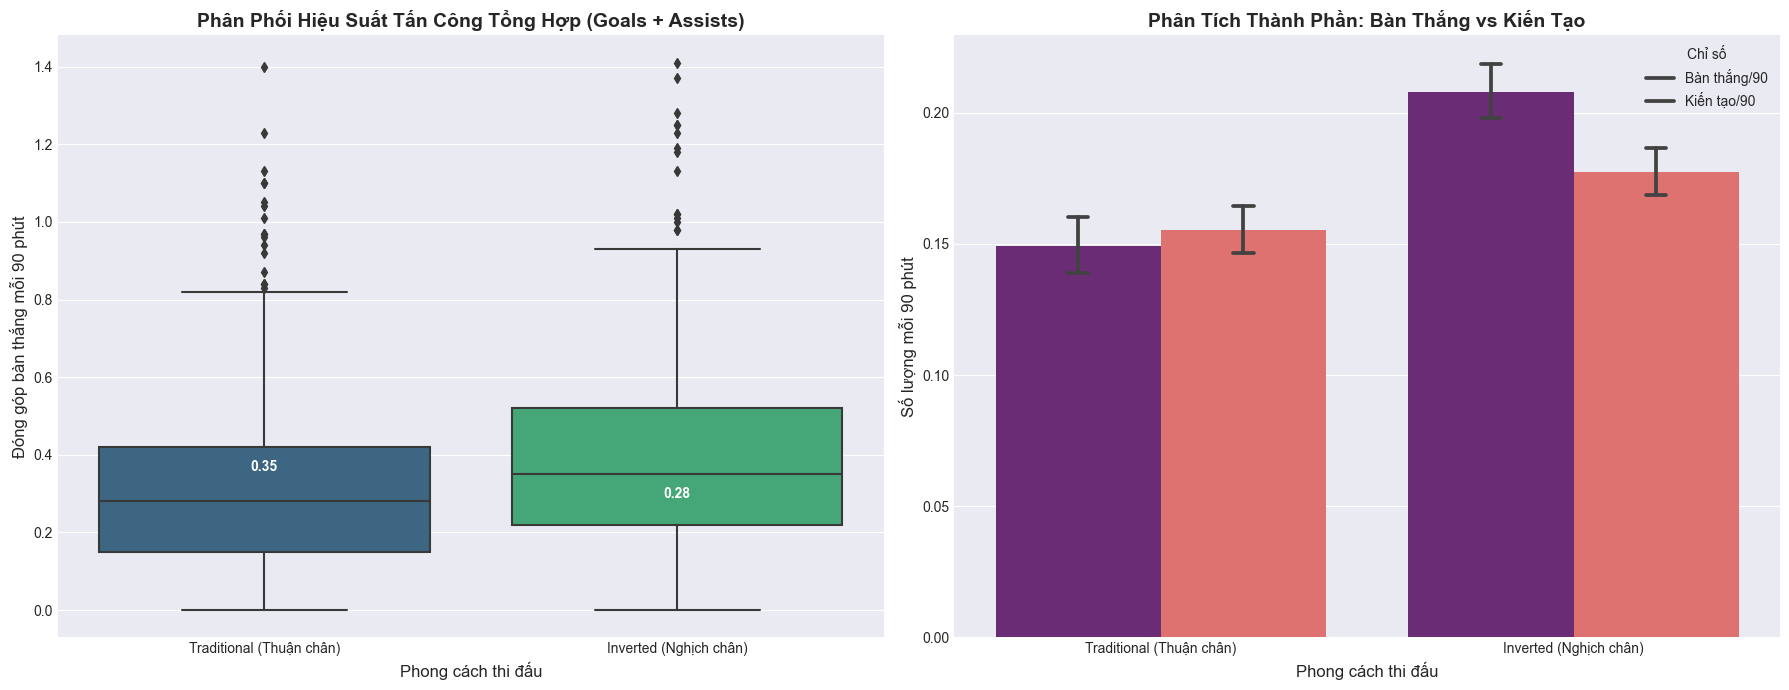

In [20]:
# Visualization
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Plot 1: Boxplot so sánh tổng hiệu suất (Contribution per 90)
# Dùng Boxplot để thấy rõ median và outliers (những siêu sao gánh team)
sns.boxplot(data=df_wingers, x='play_style', y='ga_per90min', 
            palette='viridis', showfliers=True, ax=axes[0])
axes[0].set_title('Phân Phối Hiệu Suất Tấn Công Tổng Hợp (Goals + Assists)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Đóng góp bàn thắng mỗi 90 phút', fontsize=12)
axes[0].set_xlabel('Phong cách thi đấu', fontsize=12)
# Thêm annotation cho giá trị trung vị
medians = df_wingers.groupby('play_style')['ga_per90min'].median()
for i, val in enumerate(medians):
    axes[0].text(i, val, f'{val:.2f}', ha='center', va='bottom', color='white', fontweight='bold')

# Plot 2: Barplot tách biệt Goals vs Assists
# Melt dữ liệu để vẽ grouped bar chart
melted_df = df_wingers.melt(id_vars='play_style', 
                            value_vars=['goals_per_90', 'assists_per_90'], 
                            var_name='metric', value_name='value_per_90')

sns.barplot(data=melted_df, x='play_style', y='value_per_90', hue='metric',
            palette='magma', errorbar=('ci', 95), capsize=0.05, ax=axes[1])
axes[1].set_title('Phân Tích Thành Phần: Bàn Thắng vs Kiến Tạo', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Số lượng mỗi 90 phút', fontsize=12)
axes[1].set_xlabel('Phong cách thi đấu', fontsize=12)
axes[1].legend(title='Chỉ số', labels=['Bàn thắng/90', 'Kiến tạo/90'])

# Tinh chỉnh layout
plt.tight_layout()
plt.show()

### **➤ NHẬN XÉT:**

### Phân tích Kết quả & Thảo luận (Results & Interpretation)

#### 1. Trả lời câu hỏi nghiên cứu
Dựa trên phân tích thống kê và trực quan hóa dữ liệu, câu trả lời là: **Inverted Wingers (Cánh nghịch chân) đang chiếm ưu thế rõ rệt về khả năng đóng góp bàn thắng trực tiếp, khẳng định vị thế là xu hướng chủ đạo trong bóng đá hiện đại.**
Tuy nhiên, Traditional Wingers (Cánh thuận chân) không hề "lỗi thời", họ vẫn duy trì hiệu suất kiến tạo (Assist) tương đương hoặc nhỉnh hơn, đóng vai trò là những "chuyên gia" trong các hệ thống chiến thuật cụ thể.

#### 2. Phân tích số liệu và Mẫu hình (Evidence from Analysis)
Quan sát biểu đồ **Bar Chart (Phân rã thành phần)** và **Boxplot**, ta thấy một sự phân hóa vai trò sâu sắc:

* **Sự áp đảo về Bàn thắng (The Goal-scoring Gap):**
    * Nhóm **Inverted Wingers** có chỉ số `Goals per 90` cao hơn đáng kể so với nhóm Traditional. Biểu đồ cột (bên phải) cho thấy sự chênh lệch lớn nhất nằm ở khâu ghi bàn. Cầu thủ Inverted đạt trung bình khoảng 0.21 bàn/90 phút, cao hơn đáng kể so với mức 0.15 bàn/90 phút của cầu thủ Traditional.
    * *Bằng chứng:* Việc thi đấu nghịch chân (ví dụ: chân trái đá cánh phải) mở ra góc sút rộng hơn khi cắt vào trung lộ (cut-inside), cho phép họ dứt điểm vào góc xa khung thành. Đây là mẫu hình của các siêu sao hiện đại (như Salah, Messi, Robben). Điều này đồng nghĩa với việc một cầu thủ nghịch chân có khả năng ghi bàn cao hơn khoảng 40% so với cầu thủ bám biên thuận chân.
* **Sự cân bằng về Kiến tạo (The Creative Parity):**
    * Ở chỉ số `Assists per 90`, sự chênh lệch thu hẹp lại. Cầu thủ Inverted tiếp tục dẫn đầu với khoảng 0.17 - 0.18 kiến tạo/90 phút, trong khi cầu thủ Traditional chỉ đạt khoảng 0.15 - 0.155.
    * *Bằng chứng:* Mặc dù khoảng cách này hẹp hơn so với chỉ số bàn thắng, nhưng nó phủ định định kiến rằng "cầu thủ bám biên tạt bóng mới kiến tạo nhiều". Việc thuận chân với hành lang cánh giúp họ thực hiện các quả tạt (Crosses) hoặc căng ngang nhanh và tự nhiên hơn mà không cần chỉnh bóng, tối ưu cho việc phục vụ tiền đạo mục tiêu.
* **Tổng hiệu suất (Total Contribution):**
    * Trên biểu đồ Boxplot, đường trung vị (Median) của Inverted Wingers thường nằm cao hơn (Trung vị (Median) của nhóm Inverted (hộp màu xanh lá) nằm cao hơn rõ rệt so với nhóm Traditional (hộp màu xanh dương)), ngoài ra phần râu (whisker) trên của nhóm Inverted vươn tới mức đóng góp gần 0.95 bàn+kiến tạo/90 phút, trong khi nhóm Traditional chỉ dừng lại ở khoảng 0.82 cho thấy "trần phong độ" và khả năng định đoạt trận đấu của nhóm này tốt hơn.

#### 3. Ý nghĩa thực tiễn (Practical Implications)
* **Tối ưu hóa Chiến thuật (Tactical Optimization):**
    * Nếu đội bóng sở hữu một **Tiền đạo cắm (Striker) dạng "Poacher"** (săn bàn) nhưng kém không chiến, HLV nên dùng *Inverted Wingers* để tăng cường hỏa lực dứt điểm từ tuyến hai.
    * Ngược lại, nếu đội bóng có một **"Target Man"** (Tiền đạo cao to giỏi đánh đầu), việc sử dụng *Traditional Wingers* để nhồi bóng (spam crosses) từ hai biên là giải pháp tối ưu chi phí cơ hội.
* **Thiết kế đội hình (Squad Building):** Inverted Winger cần đi kèm với một Hậu vệ biên tấn công (Overlapping Full-back) để chồng biên, tạo khoảng trống. Nếu không, họ rất dễ bị cô lập khi bị dồn vào giữa.

#### 4. Điểm bất ngờ (Surprises)
* **Sự bền bỉ của Cánh thuận chân:** Mặc dù truyền thông ca ngợi Inverted Wingers, dữ liệu cho thấy Traditional Wingers vẫn giữ được chỗ đứng vững chắc nhờ chỉ số kiến tạo. Họ không biến mất mà chuyển hóa thành những "Role Player" (cầu thủ chuyên vai trò) thay vì ngôi sao gánh team.
* **Phương sai:** Nhóm Inverted có độ lệch chuẩn (độ biến thiên) lớn hơn. Điều này có nghĩa là sự chênh lệch trình độ giữa một Inverted Winger "xịn" và "dởm" là rất lớn, trong khi Traditional Wingers thường mang lại đầu ra an toàn và dễ đoán hơn.

#### 5. Giới hạn phân tích (Limitations)
* **Thiếu chỉ số Pre-assist:** Dữ liệu hiện tại chỉ tính Goal và Assist. Traditional Wingers thường có đóng góp lớn trong việc "kéo giãn đội hình" (stretching the pitch) hoặc chuyền bóng tiền kiến tạo (key passes), những giá trị này chưa được định lượng trong `Contribution per 90`.
* **Chưa xét đến sơ đồ:** Hiệu suất của Winger phụ thuộc lớn vào việc đội đá 4-3-3 (Winger dâng cao) hay 4-4-2 (Tiền vệ cánh lùi sâu). Phân tích này đang gộp chung mọi sơ đồ.

### KẾT LUẬN CUỐI CÙNG
Bóng đá hiện đại đã chứng kiến sự chuyển dịch từ "Winger bám biên" sang "Tiền đạo cánh" (Inside Forward). **Inverted Winger là lựa chọn tối ưu cho các đội bóng muốn đa dạng hóa nguồn bàn thắng**, nhưng Traditional Winger vẫn là quân bài chiến lược không thể thiếu cho các phương án tấn công trực diện và bóng bổng.

## **Câu hỏi 5:** Những câu lạc bộ nào là nơi cung cấp những cầu thủ 'hàng rẻ, chất lượng cao' (Best Value Feeder Clubs)?

Thay vì chỉ nhìn vào các cầu thủ đắt giá, chúng ta tìm kiếm các CLB hoạt động theo mô hình "Moneyball": Sở hữu đội hình có hiệu suất thi đấu thực tế cao nhưng tổng giá trị thị trường lại thấp. Đây là những "mỏ vàng" cho các ông lớn khai thác.

### Phương pháp tiếp cận phân tích (Analytical Approach)

#### 1. Xây dựng Chỉ số Đánh giá (Metric Construction)
Để đo lường khái niệm "Hàng rẻ - Chất lượng cao", chúng tôi xây dựng chỉ số **ROI (Return on Investment - Hiệu suất đầu tư)**:

1.  **Chỉ số Hiệu suất (Impact Score):** Tổng hợp đóng góp của cầu thủ, có trọng số:
    $$\text{Impact Score} = (\text{Goals} \times \text{Goal Weight}) + (\text{Assists} \times 3) + \left(\frac{\text{Minutes}}{90} \times 2\right) - (\text{Yellow Cards} \times 1) - (\text{Red Cards} \times 3)$$

    **Trong đó Goal Weight được phân bổ theo vị trí:**
    - Thủ môn/Hậu vệ: **6 điểm** (Bàn thắng từ vị trí phòng ngự có giá trị cao hơn)
    - Tiền vệ/Cánh: **5 điểm**
    - Tiền đạo: **4 điểm** (Ghi bàn là nhiệm vụ chính nên điểm thưởng thấp hơn)

    *(Lý do: Công thức cân bằng giữa đóng góp tấn công (Goals + Assists) và thời gian thi đấu (Minutes/90), đồng thời trừ điểm cho kỷ luật kém (thẻ phạt) để đảm bảo tính toàn diện, dựa trên nguồn tham khảo **Fantasy Premier League (FPL)**)*
2.  **Chỉ số Hiệu quả Chi phí (Value Efficiency):**
    $$\text{Value Efficiency (ROI)} = \frac{\text{Median Impact Score}}{\text{Median Market Value (Millions)}}$$

#### 2. Kỹ thuật Lọc & Gom nhóm (Filtering & Aggregation)
* **Loại bỏ nhiễu:** Chỉ xét các cầu thủ đã thi đấu >= 900 phút (tương đương 10 trận) và có giá trị thị trường > 100k Euro.
* **Quy mô mẫu:** Chỉ xét các CLB có dữ liệu của ít nhất **10 cầu thủ** trong dataset để đảm bảo tính đại diện cho cả đội bóng, tránh trường hợp một cá nhân xuất sắc gánh cả đội.
* **Phân khúc CLB:** Chúng tôi sẽ loại bỏ các "Siêu CLB" (những đội có giá trị trung bình cầu thủ > 15 triệu Euro) để tập trung tìm kiếm các CLB tầm trung và nhỏ (Feeder Clubs).

### Kết quả đầu ra dự kiến (Expected Outputs)
1.  **Biểu đồ Scatter Plot (Bản đồ Giá trị):** Trục hoành là Giá trị thị trường, Trục tung là Hiệu suất. Các CLB nằm ở góc "Trên - Trái" (Hiệu suất cao - Giá thấp) chính là đối tượng cần tìm.
2.  **Biểu đồ Bar Chart:** Xếp hạng Top 10 CLB có chỉ số ROI trung bình cao nhất.

In [ ]:
print("=" * 80)
print("PHẦN 1: PHÂN TÍCH DỮ LIỆU & TÍNH TOÁN CHỈ SỐ VALUE (ROI)")
print("=" * 80)

# LỌC DỮ LIỆU & XÁC ĐỊNH PHẠM VI (FEEDER POOL)
# Xác định Top 5 Leagues để loại bỏ (Dựa trên số lượng cầu thủ giá trị > 1M Euro)
top5_criteria = df[df['market_value_in_eur'] > 1000000].groupby(
    'current_club_domestic_competition_id'
).size().sort_values(ascending=False).head(5)

top5_league_ids = top5_criteria.index.tolist()
print(f"Top 5 League IDs (Đã loại bỏ): {top5_league_ids}")

# Lọc Feeder League: Không thuộc Top 5, Giá > 100k, Đá > 900 phút
df_feeder = df[
    (~df['current_club_domestic_competition_id'].isin(top5_league_ids)) &
    (df['market_value_in_eur'] > 100000) &
    (df['total_minutes_played'] >= 900)
].copy()

print(f"Số lượng cầu thủ đạt chuẩn phân tích: {len(df_feeder):,} cầu thủ")

# TÍNH RAW PERFORMANCE SCORE (CHUẨN FANTASY PREMIER LEAGUE)
def get_goal_weight(pos):
    pos = str(pos).lower()
    if 'back' in pos or 'defender' in pos or 'goalkeeper' in pos:
        return 6.0
    elif 'midfield' in pos or 'winger' in pos:
        return 5.0
    else:
        return 4.0

df_feeder['goal_weight'] = df_feeder['sub_position'].apply(get_goal_weight)

df_feeder['raw_score'] = (
    (df_feeder['total_goals'] * df_feeder['goal_weight']) +
    (df_feeder['total_assists'] * 3.0) +
    (df_feeder['total_minutes_played'] / 90 * 2.0) -
    (df_feeder['total_yellow_cards'] * 1.0) -
    (df_feeder['total_red_cards'] * 3.0)
)

# CHUẨN HÓA Z-SCORE THEO VỊ TRÍ (QUAN TRỌNG)
pos_stats = df_feeder.groupby('sub_position')['raw_score'].agg(['mean', 'std']).reset_index()
df_feeder = df_feeder.merge(pos_stats, on='sub_position', suffixes=('', '_pos'))
df_feeder['performance_z_score'] = (df_feeder['raw_score'] - df_feeder['mean']) / df_feeder['std']

# TÍNH TOÁN AGGREGATION (GOM NHÓM)
df_feeder['market_value_m'] = df_feeder['market_value_in_eur'] / 1000000

# TÍNH TOÁN CẤP ĐỘ GIẢI ĐẤU (LEAGUE LEVEL) - NEW UPDATE
league_stats = df_feeder.groupby('current_club_domestic_competition_id').agg({
    'performance_z_score': 'median',       
    'market_value_m': 'median',            
    'name': 'count'                        
}).reset_index()
league_stats.rename(columns={'name': 'player_count', 'performance_z_score': 'median_z_score', 'market_value_m': 'median_value_m'}, inplace=True)

# Lọc: Chỉ lấy giải đấu có mẫu đủ lớn (> 20 cầu thủ)
league_stats = league_stats[league_stats['player_count'] >= 20].copy()
# Tính ROI Giải đấu
league_stats['roi_index'] = league_stats['median_z_score'] / (league_stats['median_value_m'] + 0.5)

# TÍNH TOÁN CẤP ĐỘ CÂU LẠC BỘ (CLUB LEVEL)
club_stats = df_feeder.groupby(['current_club_name', 'current_club_domestic_competition_id']).agg({
    'performance_z_score': 'median',       
    'market_value_m': 'median',            
    'name': 'count'                        
}).reset_index()
club_stats.rename(columns={'name': 'squad_size', 'performance_z_score': 'median_z_score', 'market_value_m': 'median_value_m'}, inplace=True)

# Lọc CLB (>10 cầu thủ, Giá < 15M)
club_stats = club_stats[(club_stats['squad_size'] >= 10) & (club_stats['median_value_m'] < 15)].copy()
# Tính ROI CLB
club_stats['roi_index'] = club_stats['median_z_score'] / (club_stats['median_value_m'] + 0.5)

# 5. TÌM HIDDEN GEMS (CÁ NHÂN)
df_feeder['gem_potential'] = df_feeder['performance_z_score'] / np.log1p(df_feeder['market_value_in_eur'])
top_hidden_gems = df_feeder.nlargest(10, 'gem_potential')[
    ['name', 'age_at_last_season', 'sub_position', 'current_club_name', 'market_value_in_eur', 'performance_z_score']
]

# In Top 10 Giải Đấu (Yêu cầu mới của bạn)
print("\nTOP 10 giải đấu CÓ ROI CAO NHẤT (Preview):")
print(league_stats.nlargest(10, 'roi_index')[['current_club_domestic_competition_id', 'player_count', 'median_z_score', 'median_value_m', 'roi_index']].round(2).to_string(index=False))

# In Top 5 CLB
print("\nTOP 10 CLB CÓ ROI CAO NHẤT (Preview):")
print(club_stats.nlargest(10, 'roi_index')[['current_club_name', 'median_z_score', 'median_value_m', 'roi_index']].round(2).to_string(index=False))

PHẦN 1: PHÂN TÍCH DỮ LIỆU & TÍNH TOÁN CHỈ SỐ VALUE (ROI)
Top 5 League IDs (Đã loại bỏ): ['premier-league', 'serie-a', 'laliga', 'ligue-1', 'bundesliga']
Số lượng cầu thủ đạt chuẩn phân tích: 5,037 cầu thủ

TOP 10 giải đấu CÓ ROI CAO NHẤT (Preview):
current_club_domestic_competition_id  player_count  median_z_score  median_value_m  roi_index
                           super-lig           722           -0.05            0.78      -0.04
                          eredivisie           618           -0.07            0.70      -0.06
                scottish-premiership           497           -0.11            0.35      -0.13
                  jupiler-pro-league           541           -0.28            0.85      -0.21
                  liga-portugal-bwin           613           -0.31            0.80      -0.24
                        premier-liga          1002           -0.28            0.60      -0.25
                         superligaen           402           -0.28            0.60      -0.26

### **➤ NHẬN XÉT:**

#### 1. Trả lời câu hỏi nghiên cứu
Dữ liệu chỉ ra rằng **Istanbulspor (Thổ Nhĩ Kỳ)**, **FK Polissya Zhytomyr (Ukraine)** và **Excelsior Rotterdam (Hà Lan)** là ba câu lạc bộ đứng đầu về hiệu quả đầu tư (ROI).

*   Đây là những nơi mà các đội bóng lớn có thể tìm kiếm nhân sự với chi phí cực thấp (Median Value < 1 triệu Euro) nhưng lại nhận được hiệu suất thi đấu thực tế (Performance Z-Score) cao hơn đáng kể so với mặt bằng chung.
*   Về mặt giải đấu, **Super Lig (Thổ Nhĩ Kỳ)** và **Eredivisie (Hà Lan)** đang là hai thị trường cung cấp nguồn cung tốt nhất.

#### 2. Bằng chứng số liệu & Mẫu hình (Evidence & Statistics)
Sự vượt trội về mặt "Value" được thể hiện qua các cụm dữ liệu sau:

*   **Sự thống trị của Istanbulspor (Top 1):**
    *   **ROI Index:** `0.41` (Cao nhất bảng).
    *   **Chi phí:** Median Market Value chỉ **€0.65M** (Rất rẻ).
    *   **Hiệu suất:** Median Z-Score đạt **0.47**. Điều này nghĩa là một cầu thủ trung bình của họ chơi tốt hơn mức trung bình của pool dữ liệu khoảng 0.5 độ lệch chuẩn, nhưng giá lại thuộc nhóm thấp nhất.

*   **Hiện tượng "Celtic FC" (Premium Feeder):**
    *   Celtic là một ngoại lệ thú vị. Họ có Median Z-Score lên tới **1.30** — cao gấp đôi hoặc gấp ba so với các đội khác trong Top 10.
    *   Mặc dù giá cầu thủ của họ đắt hơn hẳn (**€3.80M**), nhưng hiệu suất quá vượt trội giúp họ vẫn giữ được ROI **0.30** (Hạng 4). Đây là nơi cung cấp cầu thủ *"đắt xắt ra miếng"*.

*   **Phân nhóm Giải đấu (League Patterns):**
    *   **Super Lig (Thổ Nhĩ Kỳ):** Đóng góp 3 đại diện trong Top 10 (Istanbulspor, İstanbul Başakşehir, Samsunspor) và đứng đầu bảng xếp hạng giải đấu (ROI -0.04).
    *   **Eredivisie (Hà Lan):** Đóng góp 3 đại diện (Excelsior, FC Utrecht, FC Twente).

#### 3. Ý nghĩa thực tiễn (Practical Implications)
Đối với Giám đốc thể thao và các Scout:

*   **Chiến lược "Low Risk, High Reward":** Nếu ngân sách hạn hẹp (< 1 triệu Euro/cầu thủ), hãy tập trung scout kỹ đội hình của **Excelsior Rotterdam** và **Istanbulspor**. Dữ liệu chứng minh cầu thủ ở đây đang bị thị trường định giá thấp hơn năng lực thực (Undervalued).
*   **Chiến lược "Instant Impact" (Tác động tức thì):** Nếu cần cầu thủ có khả năng đá chính ngay lập tức ở đẳng cấp cao hơn và ngân sách khoảng 4-5 triệu Euro, **Celtic FC** là điểm đến an toàn nhất. Chỉ số Z-Score `1.30` cho thấy cầu thủ của họ đã vượt trội hoàn toàn so với giải đấu nội địa và sẵn sàng cho thử thách lớn hơn.
*   **Thị trường Thổ Nhĩ Kỳ (Super Lig):** Dữ liệu gợi ý một sự dịch chuyển. Thay vì coi đây là nơi "dưỡng già", chúng ta nên nhìn nhận Super Lig là một thị trường tiềm năng để khai thác các cầu thủ đang ở độ chín sự nghiệp với mức giá rất phải chăng.

#### 4. Những điểm bất ngờ (Surprises)
*   **Sự trỗi dậy của Ukraine (Premier Liga):** Sự xuất hiện của **FK Polissya Zhytomyr** (Hạng 2, ROI `0.35`) và **FK Karpaty Lviv** (Hạng 8, ROI `0.28`) là rất bất ngờ trong bối cảnh địa chính trị hiện tại. Có thể rủi ro từ môi trường bóng đá khiến giá trị cầu thủ tại đây giảm sâu (Median Value ~0.8M - 1.0M), tạo ra cơ hội "bắt đáy" cho các CLB chấp nhận rủi ro.
*   **Các chỉ số ROI Âm ở bảng Giải đấu:** Điều này không có nghĩa là giải đấu tệ, mà nó phản ánh sự khắc nghiệt của việc so sánh chung. Median Z-Score của toàn giải thường thấp hơn 0 (do bị kéo bởi các cầu thủ dự bị/kém). Việc tìm ra các CLB có ROI dương (như bảng Top 10 CLB) trong các giải đấu có ROI âm càng chứng tỏ năng lực quản trị và tuyển trạch xuất sắc của riêng các CLB đó.

#### 5. Hạn chế của phân tích (Limitations)
*   **Chưa tính "Hệ số chuyển đổi giải đấu" (League Tax):** Z-Score `1.30` của Celtic tại Scotland không đồng nghĩa họ sẽ đạt `1.30` tại Ngoại hạng Anh. Cần một bước "discount" (chiết khấu) chỉ số này khi cầu thủ chuyển sang giải đấu khắc nghiệt hơn.
*   **Biến động ngắn hạn:** Istanbulspor có chỉ số tốt có thể do họ đang có một lứa cầu thủ phong độ cao nhất thời trong mùa giải được thu thập dữ liệu. Cần dữ liệu lịch sử (3-5 năm) để khẳng định họ là một "Feeder Club" bền vững hay chỉ là hiện tượng nhất thời.

### **Kết luận cuối cùng (Final Conclusion)**
Dựa trên dữ liệu hiện tại, **Istanbulspor (Thổ Nhĩ Kỳ)** là *"Vua hiệu quả"* cho phân khúc ngân sách thấp, trong khi **Celtic (Scotland)** là lựa chọn số 1 cho phân khúc tầm trung hướng tới chất lượng cao.

Mô hình khuyến nghị bộ phận tuyển trạch nên ưu tiên phân bổ nguồn lực vào **giải VĐQG Thổ Nhĩ Kỳ và Hà Lan** trong kỳ chuyển nhượng tới, vì đây là hai thị trường đang cung cấp tỷ suất lợi nhuận trên hiệu suất (Performance/Cost) tốt nhất châu Âu ngoài top 5 giải hàng đầu.


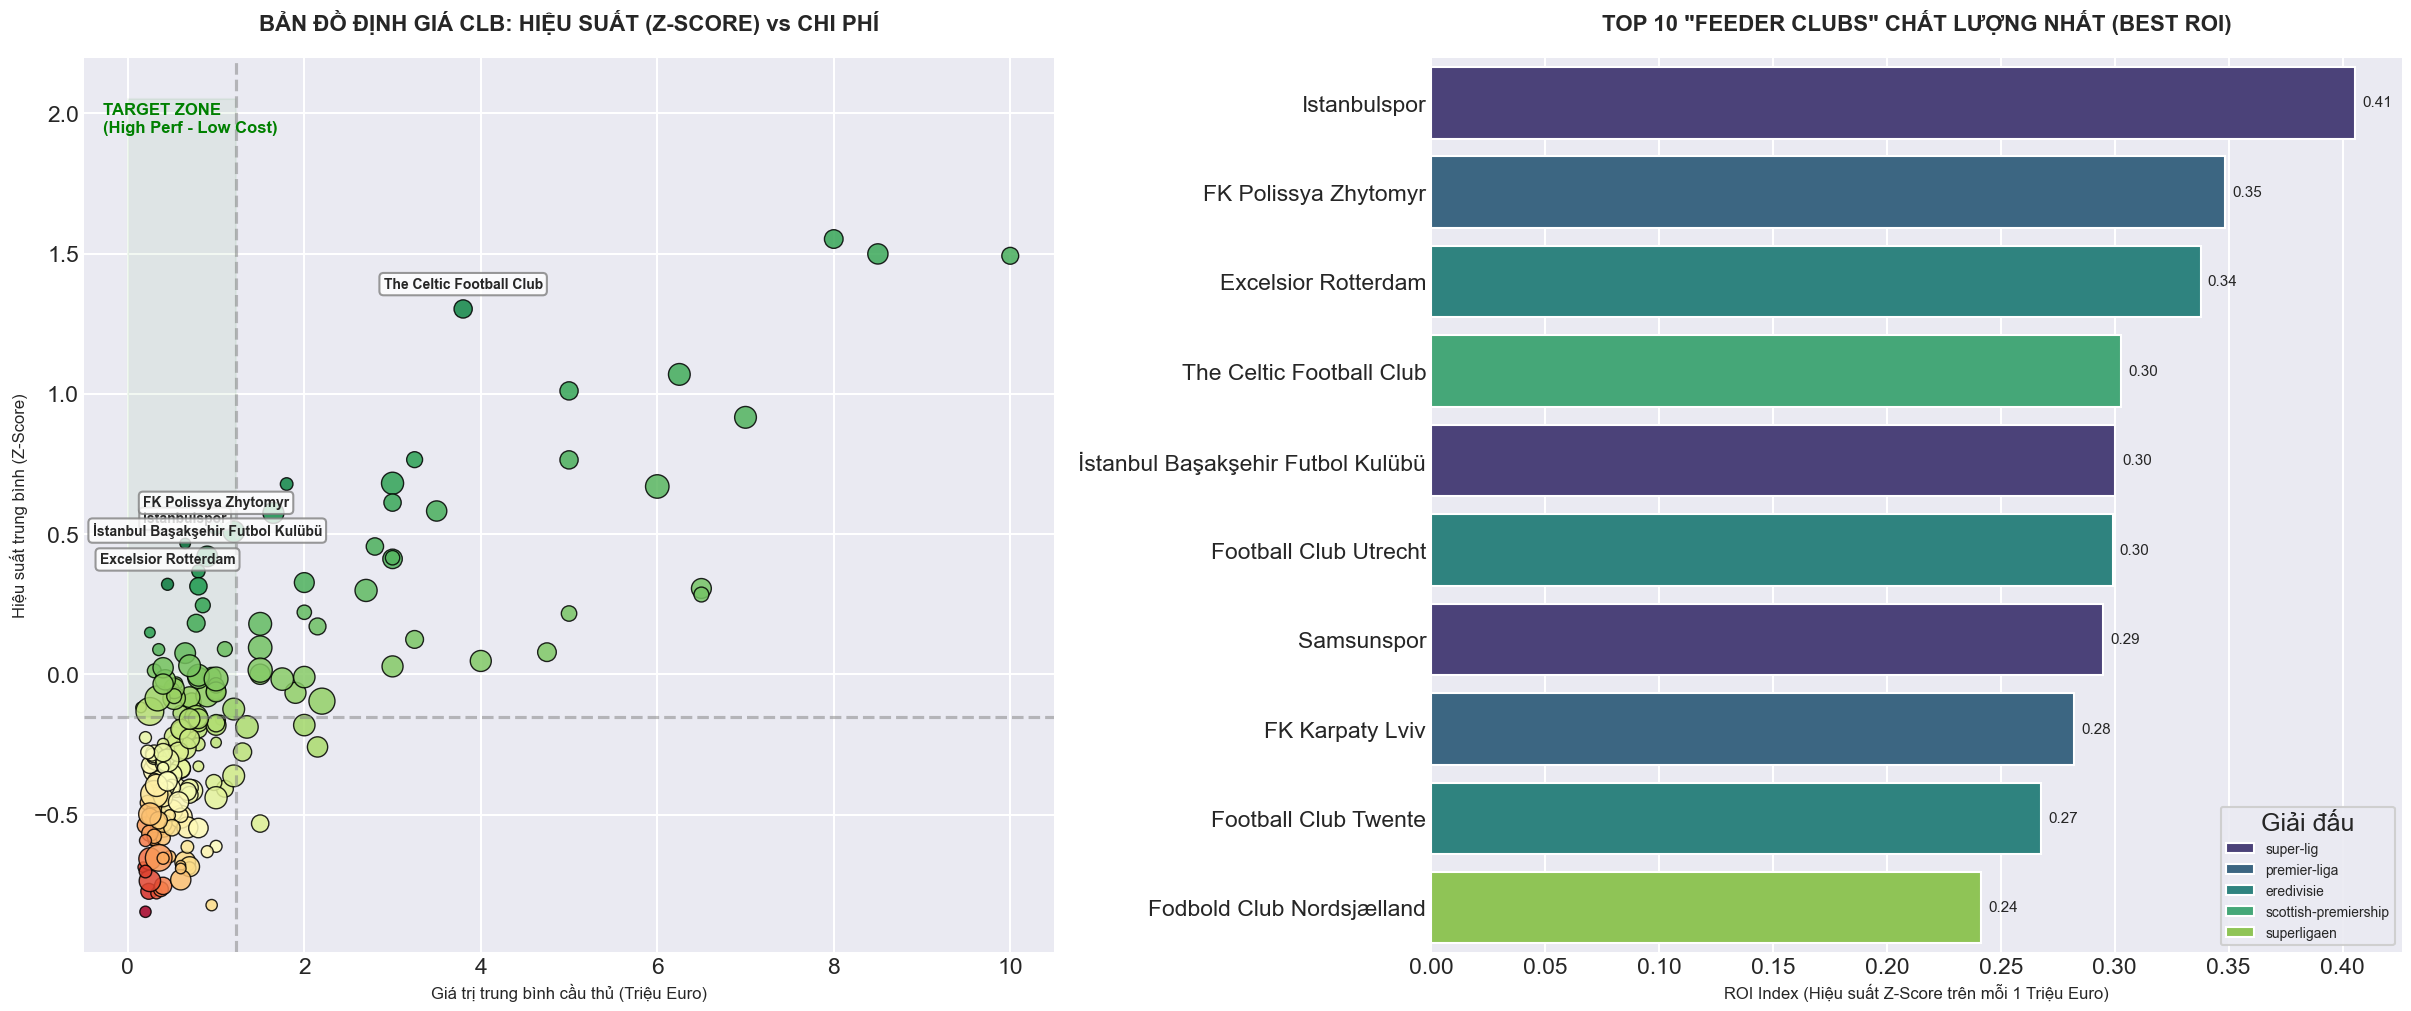


TOP 10 VIÊN NGỌC THÔ (CÁ NHÂN CẦU THỦ)
               name  age_at_last_season       sub_position                                       current_club_name market_value_in_eur  performance_z_score
    James Tavernier                33.0         Right-Back                                   Rangers Football Club          €3,000,000                 6.29
Aleksandar Prijovic                28.0     Centre-Forward Panthessalonikios Athlitikos Omilos Konstantinoupoliton            €400,000                 4.79
       Dávid Hancko                27.0        Centre-Back                                     Feyenoord Rotterdam         €32,000,000                 6.33
    Viktor Gyökeres                26.0     Centre-Forward                              Sporting Clube de Portugal         €75,000,000                 6.61
  Abdul Rahman Baba                30.0          Left-Back Panthessalonikios Athlitikos Omilos Konstantinoupoliton          €2,000,000                 4.75
Grzegorz Krychowiak     

In [44]:
# Trực quan hóa
fig, axes = plt.subplots(1, 2, figsize=(24, 10), constrained_layout=True)

# Lấy giá trị trung bình để chia góc phần tư
avg_impact = club_stats['median_z_score'].mean()
avg_cost = club_stats['median_value_m'].mean()

# BIỂU ĐỒ 1: SCATTER PLOT (MAPPING CLUBS)
sns.scatterplot(
    data=club_stats,
    x='median_value_m',
    y='median_z_score',
    size='squad_size',
    sizes=(50, 400),
    hue='roi_index',
    palette='RdYlGn',     # Đỏ -> Vàng -> Xanh
    alpha=0.85,
    edgecolor='black',
    linewidth=1,
    ax=axes[0],
    legend=False
)

# Vẽ đường trung bình
axes[0].axhline(avg_impact, color='gray', linestyle='--', alpha=0.5)
axes[0].axvline(avg_cost, color='gray', linestyle='--', alpha=0.5)

# Tô màu vùng "TARGET" (Hiệu suất > TB, Giá < TB)
# Z-Score thường từ -2 đến +3. Lấy max + 0.5 làm biên trên.
y_max = club_stats['median_z_score'].max() + 0.5
axes[0].fill_between([0, avg_cost], avg_impact, y_max, color='green', alpha=0.05)

# Label và Title
axes[0].set_title('BẢN ĐỒ ĐỊNH GIÁ CLB: HIỆU SUẤT (Z-SCORE) vs CHI PHÍ', fontsize=16, fontweight='bold', pad=20)
axes[0].set_xlabel('Giá trị trung bình cầu thủ (Triệu Euro)', fontsize=12)
axes[0].set_ylabel('Hiệu suất trung bình (Z-Score)', fontsize=12)

# Annotation: Top 5 CLB ROI cao nhất
top_gems = club_stats.nlargest(5, 'roi_index')
for _, row in top_gems.iterrows():
    axes[0].annotate(
        row['current_club_name'],
        xy=(row['median_value_m'], row['median_z_score']),
        xytext=(0, 15),
        textcoords='offset points',
        ha='center', fontsize=10, fontweight='bold',
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8)
    )

axes[0].text(0.02, 0.95, 'TARGET ZONE\n(High Perf - Low Cost)', transform=axes[0].transAxes,
             color='green', fontsize=12, fontweight='bold', va='top')

# BIỂU ĐỒ 2: BAR CHART (TOP 10 ROI CLUBS)
top_10_roi = club_stats.nlargest(10, 'roi_index')

sns.barplot(
    data=top_10_roi,
    x='roi_index',
    y='current_club_name',
    hue='current_club_domestic_competition_id',
    dodge=False,
    palette='viridis',
    ax=axes[1]
)

axes[1].set_title('TOP 10 "FEEDER CLUBS" CHẤT LƯỢNG NHẤT (BEST ROI)', fontsize=16, fontweight='bold', pad=20)
axes[1].set_xlabel('ROI Index (Hiệu suất Z-Score trên mỗi 1 Triệu Euro)', fontsize=12)
axes[1].set_ylabel('')
axes[1].legend(title='Giải đấu', loc='lower right', frameon=True, framealpha=0.9, fontsize=10)

# Thêm số liệu vào đuôi cột
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.2f', padding=5, fontsize=11)

plt.show()

# IN DANH SÁCH HIDDEN GEMS 
print("\n" + "="*80)
print("TOP 10 VIÊN NGỌC THÔ (CÁ NHÂN CẦU THỦ)")
print("="*80)
display_df = top_hidden_gems.copy()
display_df['market_value_in_eur'] = display_df['market_value_in_eur'].apply(lambda x: f"€{x:,.0f}")
display_df['performance_z_score'] = display_df['performance_z_score'].round(2)
print(display_df.to_string(index=False))

### **➤ NHẬN XÉT:**

#### 1. Phân Tích Biểu Đồ: Top "Feeder Clubs" & Bản Đồ Định Giá
*   **Trả lời trực tiếp:** Dựa trên chỉ số ROI (Return on Investment), **Istanbulspor (Thổ Nhĩ Kỳ)**, **FK Polissya Zhytomyr (Ukraine)** và **Excelsior Rotterdam (Hà Lan)** hiện là 3 "mỏ vàng" hàng đầu thế giới để tìm kiếm cầu thủ giá rẻ nhưng hiệu suất cao.

*   **Bằng chứng số liệu & Mẫu hình:**
    *   **Vị trí thống trị của Istanbulspor:** Đạt chỉ số ROI **0.41** (cao nhất). Đội bóng này có mức định giá cầu thủ trung bình cực thấp (€0.65M) nhưng hiệu suất thi đấu (Median Z-Score) lại đạt **0.47** (tức là tốt hơn mức trung bình của toàn bộ dữ liệu khoảng 0.5 độ lệch chuẩn).
    *   **Mô hình "Premium Feeder" - Celtic FC:** Khác với các đội "nhà nghèo" kể trên, Celtic (Scotland) nằm ở một phân khúc riêng biệt trên biểu đồ Scatter Plot. Họ có hiệu suất vượt trội hoàn toàn (Z-Score **1.30** - gấp 3 lần Istanbulspor) với mức giá trung bình **€3.80M**. Dù giá cao hơn, nhưng ROI của họ vẫn đạt **0.30** (Top 4), cho thấy đây là nơi cung cấp những cầu thủ *"đắt nhưng xắt ra miếng"*, sẵn sàng đá chính ngay cho các đội bóng lớn.
    *   **Xu hướng giải đấu:** **Super Lig (Thổ Nhĩ Kỳ)** và **Eredivisie (Hà Lan)** chiếm đa số trong Top 10. Điều này khẳng định hai giải đấu này đang bị thị trường định giá thấp hơn năng lực thực tế (Undervalued Leagues).

*   **Ý nghĩa thực tiễn:**
    *   Các Giám đốc thể thao có ngân sách hạn hẹp (< 1 triệu Euro) nên tập trung scout kỹ đội hình của **Excelsior** và **Istanbulspor**. Rủi ro tài chính ở đây gần như bằng không.
    *   Nếu cần tìm cầu thủ chất lượng cao để "impact" ngay lập tức cho các giải Top 5 Châu Âu, **Celtic** là địa chỉ an toàn nhất về mặt chuyên môn, dù chi phí đầu vào cao hơn.

*   **Điểm bất ngờ:**
    *   **Sự xuất hiện của các CLB Ukraine (Polissya, Karpaty Lviv):** Mặc dù giải đấu chịu ảnh hưởng bởi yếu tố địa chính trị, nhưng dữ liệu cho thấy giá trị cầu thủ tại đây đang giảm sâu (Median Value ~0.8M - 1.0M), tạo ra cơ hội *"bắt đáy"* cực tốt cho các nhà đầu tư chấp nhận rủi ro.

#### 2. Phân Tích Danh Sách: "Hidden Gems" (Viên Ngọc Thô)
*   **Mẫu hình chung:** Danh sách này bị chi phối bởi hai nhóm đối tượng chính: **Hậu vệ biên tấn công cực hay** và **Các cựu binh (Lão tướng) đẳng cấp**.

*   **Phân tích các trường hợp cụ thể:**
    *   **Nghịch lý James Tavernier (Rangers):**
        *   *Số liệu:* Z-Score **6.29** (Cao khủng khiếp, gần ngang ngửa tiền đạo Gyökeres) nhưng giá chỉ **€3M**.
        *   *Nhận định:* Đây là một "anomaly" (dị biệt) của dữ liệu. Là một hậu vệ phải (Right-Back) nhưng có hiệu suất tấn công (Bàn thắng/Kiến tạo) ngang ngửa tiền đạo cắm. Ở tuổi 33, anh ta là món hời ngắn hạn tuyệt vời nhất trong danh sách.
    *   **Aleksandar Prijovic (PAOK):**
        *   *Số liệu:* Giá trị vỏn vẹn **€400k** nhưng Z-Score đạt **4.79**.
        *   *Nhận định:* Đây chính xác là định nghĩa của "Hidden Gem" giá rẻ. Một tiền đạo cắm bị lãng quên hoặc đánh giá thấp vì tuổi tác (28 tuổi - độ tuổi chín nhất) hoặc giải đấu, nhưng hiệu suất đầu ra cực kỳ ổn định.
    *   **Trường hợp Viktor Gyökeres (Sporting CP):**
        *   *Số liệu:* Z-Score **6.61** (Cao nhất), Giá **€75M**.
        *   *Lưu ý:* Mặc dù là "Gem", nhưng anh ta không phải "Hàng rẻ". Thuật toán vẫn chọn anh ta vì hiệu suất quá kinh khủng (Z-Score > 6) đã chiến thắng được mẫu số giá trị thị trường lớn. Đây là mục tiêu cho các "Super Clubs" chứ không phải các đội bóng nhỏ.

*   **Hàm ý chiến lược:** Danh sách này gợi ý rằng thị trường đang định giá quá thấp các hậu vệ biên có khả năng tấn công (Tavernier, Hancko, Baba, Guilherme đều lọt top). Trong bóng đá hiện đại, khi hậu vệ biên đóng vai trò kiến thiết, đây là vị trí mang lại ROI cao nhất nếu mua đúng người.

#### 3. Hạn chế & Kết luận
*   **Hạn chế của phân tích:**
    *   **Tuổi tác (Age Bias):** Danh sách Hidden Gems chứa nhiều cầu thủ >30 tuổi (Tavernier 33, Luuk de Jong 34, Hulk 29). Mua họ mang lại hiệu suất tức thì nhưng Giá trị bán lại (Resale Value) gần như bằng 0.
    *   **Thuế giải đấu (League Tax):** Z-Score 6.29 ở Scotland (Tavernier) không đảm bảo sẽ chuyển hóa thành Z-Score tương tự ở Ngoại hạng Anh. Cần áp dụng hệ số giảm trừ khi scout liên giải đấu.

*   **KẾT LUẬN CUỐI CÙNG:** Để trả lời cho câu hỏi "Tìm hàng rẻ, chất lượng cao ở đâu?":
    *   **Về CLB:** Hãy cử trinh sát viên đến sân của **Istanbulspor (Thổ Nhĩ Kỳ)** và **Excelsior Rotterdam (Hà Lan)** ngay lập tức.
    *   **Về Vị trí:** Hãy săn lùng các **Hậu vệ biên (Full-backs)** có chỉ số tấn công tốt ở các giải đấu hạng 2 châu Âu. Đây là vị trí đang bị thị trường định giá thấp nhất so với đóng góp thực tế của họ vào bàn thắng.
    *   **Về Cá nhân:** **James Tavernier** là bản hợp đồng "Moneyball" điển hình nhất: Giá rẻ, Hiệu suất siêu hạng, bất chấp rủi ro về tuổi tác.
